<a href="https://colab.research.google.com/github/rubygagguturi10/Next24Tech/blob/main/Road_Lane_Line_Detection_System(Task_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

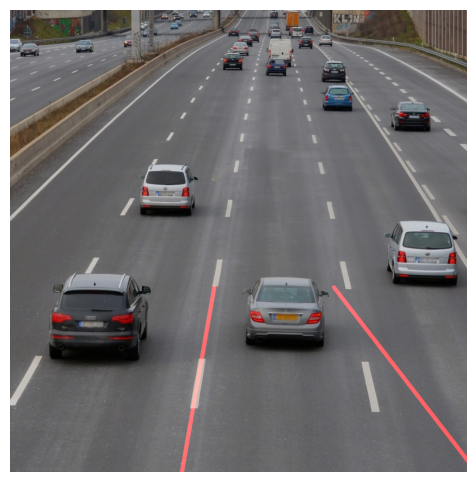

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to perform Canny Edge Detection
def canny_edge_detector(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

# Function to mask the region of interest
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([[(200, height), (1100, height), (550, 250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

# Function to display detected lines
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image

# Function to calculate line coordinates
def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1 * 3 / 5)
    x1 = int((y1 - intercept) / slope)
    x2 = int((y2 - intercept) / slope)
    return np.array([x1, y1, x2, y2])

# Function to average the detected lines
def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))

    left_fit_average = np.average(left_fit, axis=0) if left_fit else None
    right_fit_average = np.average(right_fit, axis=0) if right_fit else None

    left_line = make_coordinates(image, left_fit_average) if left_fit_average is not None else None
    right_line = make_coordinates(image, right_fit_average) if right_fit_average is not None else None

    return np.array([left_line, right_line])

# Perform lane detection on the uploaded image
def lane_detection_image(image):
    canny_image = canny_edge_detector(image)
    cropped_image = region_of_interest(canny_image)
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi / 180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    averaged_lines = average_slope_intercept(image, lines)
    line_image = display_lines(image, averaged_lines)
    combined_image = cv2.addWeighted(image, 0.8, line_image, 1, 1)
    return combined_image

# Load the uploaded image
image_path = "/content/Road.jpg"  # Update this path as necessary for your local image
image = cv2.imread(image_path)

# Convert the image to RGB (since OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform lane detection on the image
output_image = lane_detection_image(image_rgb)

# Display the result
plt.figure(figsize=(10,6))
plt.imshow(output_image)
plt.axis('off')
plt.show()


In [1]:
!pip install google-colab
!pip install opencv-python
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


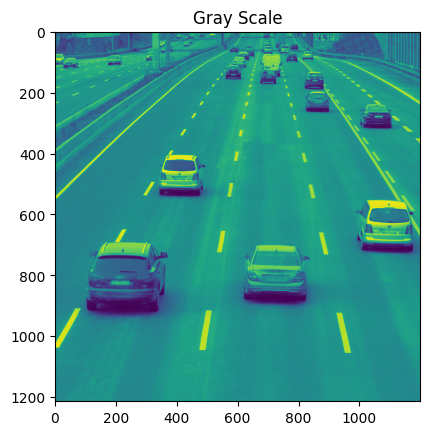

In [3]:
#Reading color image
img = cv2.imread("/content/Road.jpg")

#converting color image to grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title("Gray Scale")
plt.show()

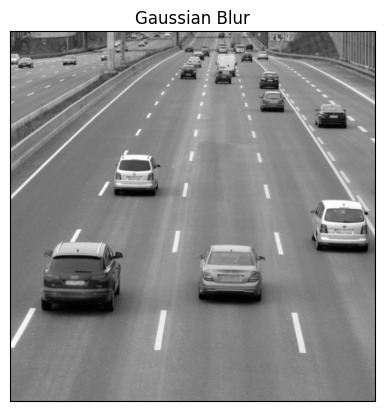

In [4]:
cv2.blur = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(cv2.blur , cmap = "gray")
plt.title("Gaussian Blur"), plt.xticks([]), plt.yticks([])
plt.show()

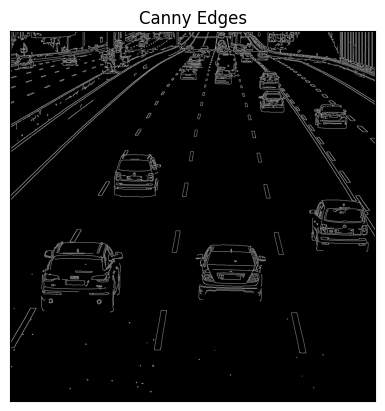

In [5]:
cv2.edges = cv2.Canny(img, 100, 200)
plt.imshow(cv2.edges, cmap = "gray")
plt.title("Canny Edges"), plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_yellow = np.array([20, 100, 100], dtype = "uint8")
upper_yellow = np.array([30, 255, 255], dtype = "uint8")

mask_yellow = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
mask_white = cv2.inRange(gray, 200, 255)
mask_yw = cv2.bitwise_or(mask_white, mask_yellow)
mask_yw_image = cv2.bitwise_and(gray, mask_yw)

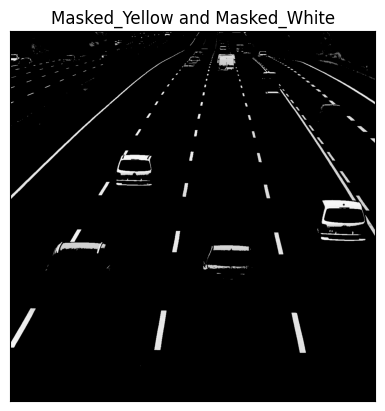

In [7]:
plt.imshow(mask_yw_image, cmap = "gray")
plt.title("Masked_Yellow and Masked_White"), plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
def region(image):
    height, width = image.shape[:2]

    triangle = np.array([
                       [(100, height), (475, 325), (width, height)]
                       ])

    mask = np.zeros_like(image)

    cv2.fillPoly(mask, triangle, 255)

    mask = cv2.bitwise_and(image, mask)

    return mask

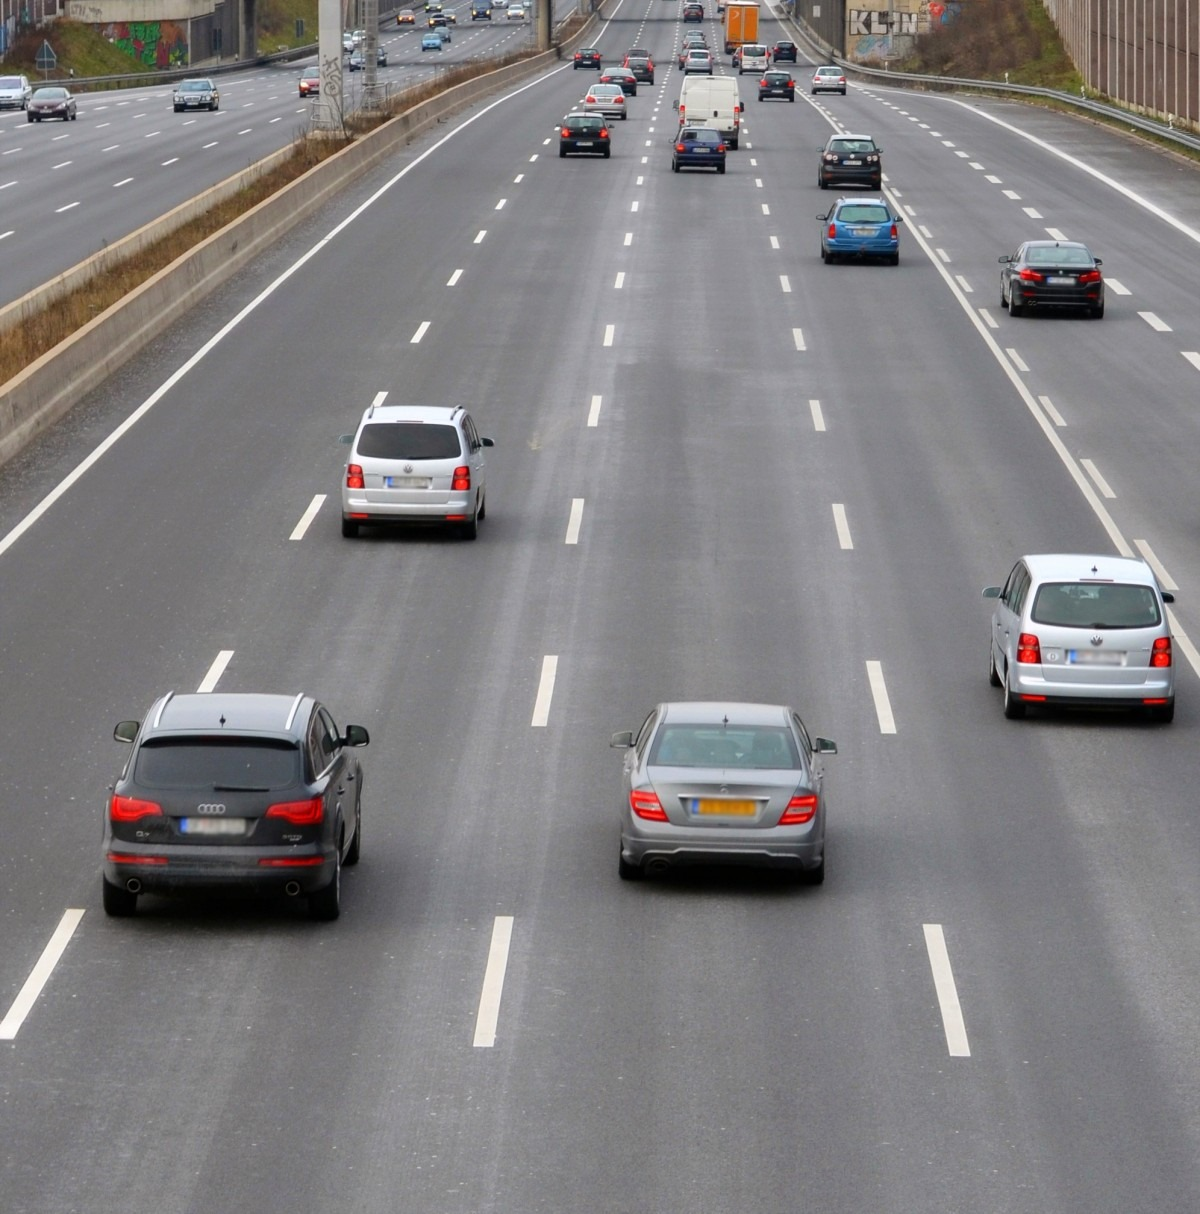

In [10]:
image = cv2.imread('/content/Road.jpg')

mask = region(image)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
def region(image):
    height, width = image.shape[:2]


    triangle = np.array([
                       [(100, height), (475, 325), (width, height)]
                       ])

    mask = np.zeros_like(image)


    cv2.fillPoly(mask, triangle, 255)

    mask_image = cv2.bitwise_and(image, mask)

    return mask_image

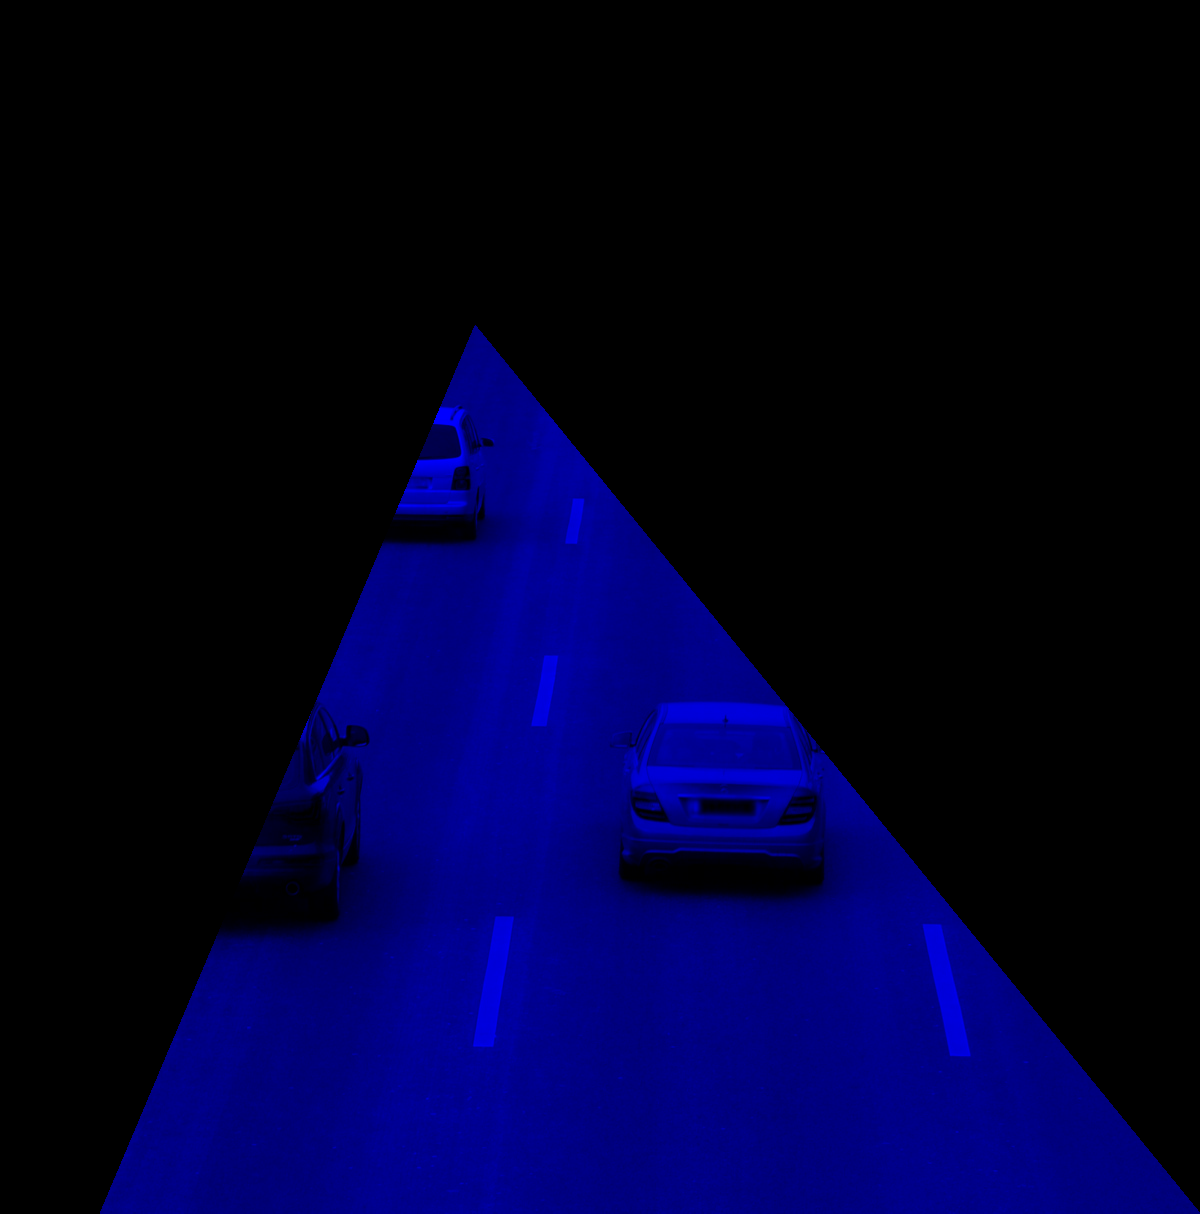

In [12]:
image = cv2.imread('/content/Road.jpg')

mask_image = region(image)

cv2_imshow(mask_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
def region(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    height, width = image.shape
    triangle = np.array([
                       [(100, height), (475, 325),(width,height)]
                       ])
    mask = np.zeros_like(image)

    cv2.fillConvexPoly(mask, triangle, 255)
    mask = cv2.bitwise_and(image, mask)
    return mask

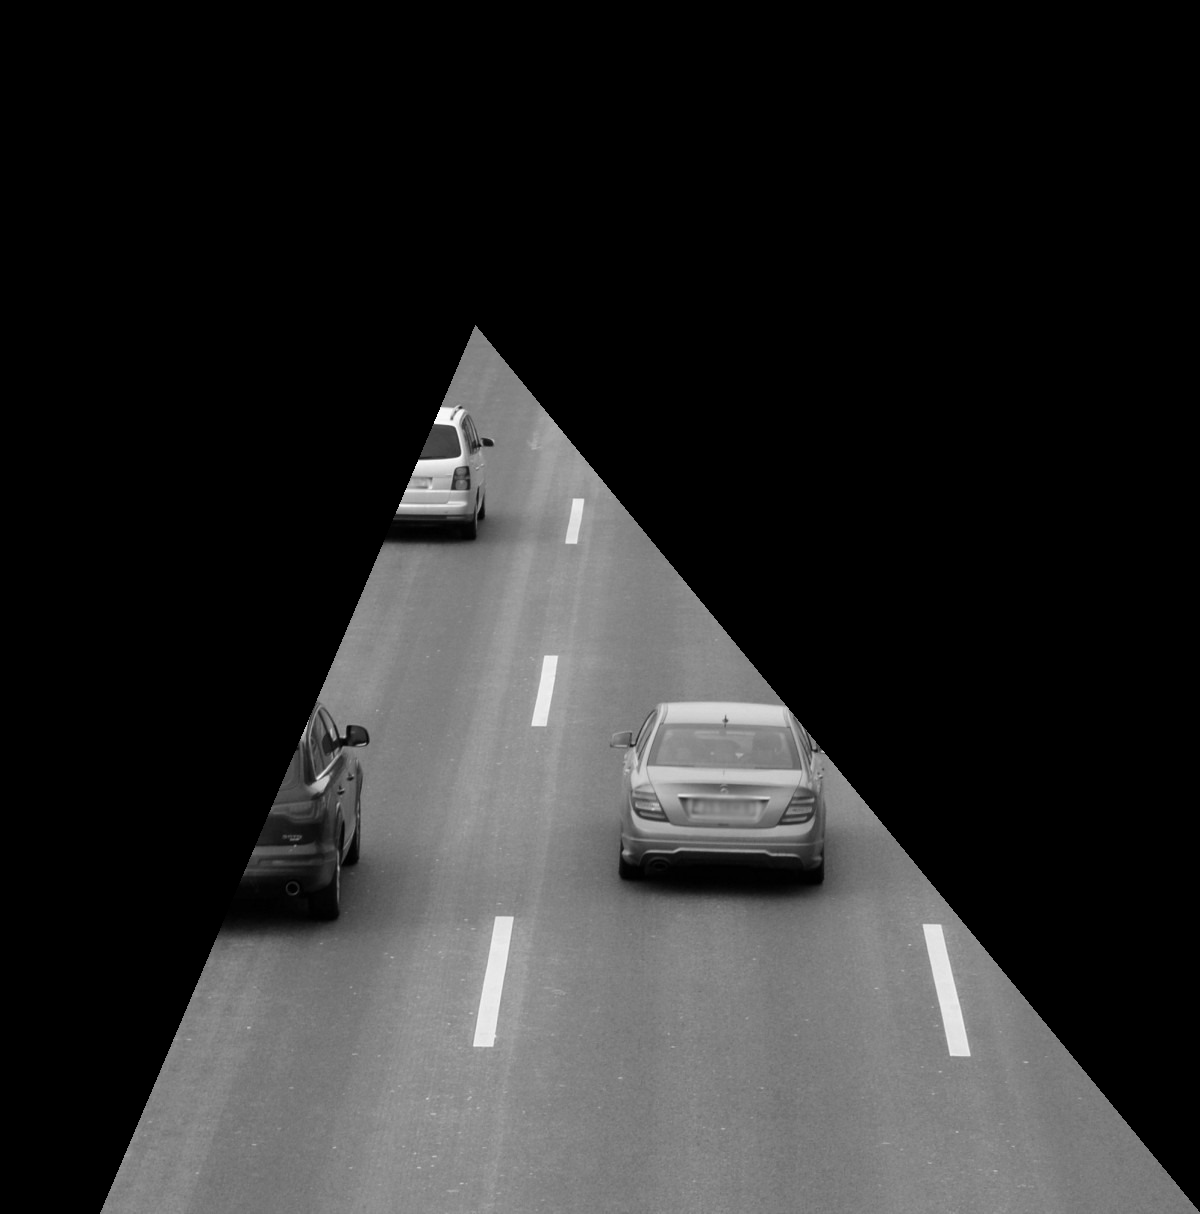

In [14]:
image = cv2.imread('/content/Road.jpg')

mask = region(image)

cv2_imshow(mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
def region(image):
    height, width = image.shape[:2]
    triangle = np.array([
        [(100, height), (475, 325), (width, height)]
    ])


    mask = np.zeros_like(image)


    cv2.fillPoly(mask, triangle, 255)


    masked_image = cv2.bitwise_and(image, mask)


    gray_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)


    edges = cv2.Canny(gray_image, 50, 150)

    edge_mask = np.zeros_like(edges)


    edge_mask[edges != 0] = 255


    final_image = cv2.bitwise_and(image, image, mask=edge_mask)

    return final_image

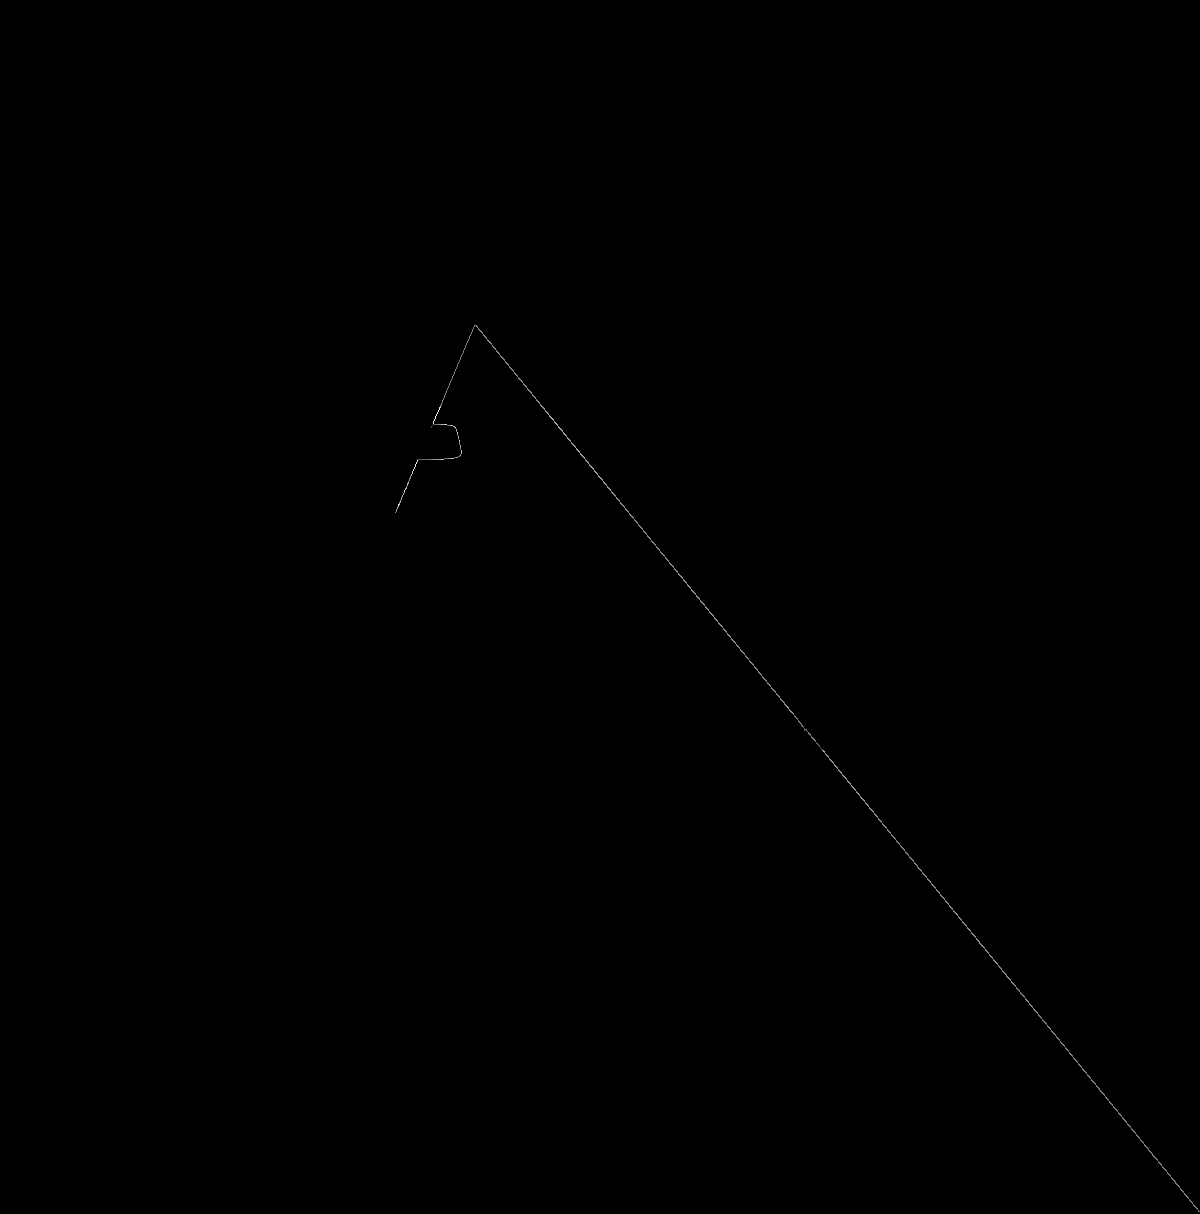

In [16]:
image = cv2.imread('/content/Road.jpg')

edges_image = region(image)

cv2_imshow(edges_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

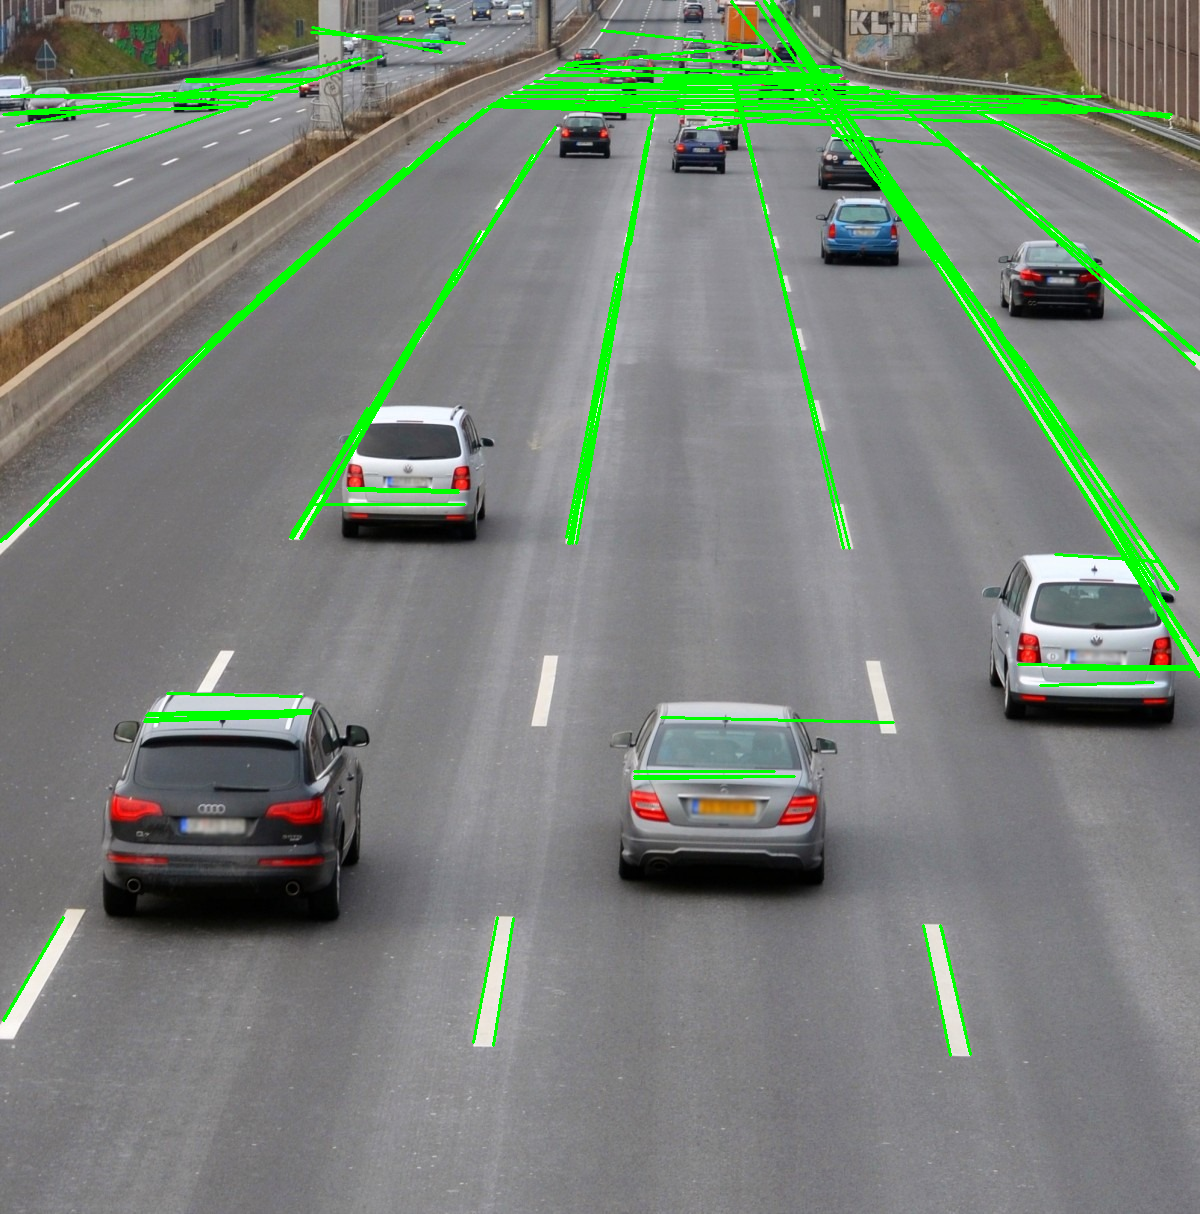

In [17]:
isolated = cv2.Canny(mask_yw_image, 50, 150)
lines = cv2.HoughLinesP(isolated, rho=2, theta=np.pi/180, threshold=100,  minLineLength=100, maxLineGap=100)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
def average(image, lines):
    left = []
    right = []
    for line in lines:
        print(line)
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        y_int = parameters[1]
        if slope < 0:
            left.append((slope, y_int))
        else:
            right.append((slope, y_int))
    return left, right

In [19]:
def make_points(image, average):
  slope, y_int = average
  y1 = image.shape[0]
  y2 = int(y1 * (3/5))
  x1 = int((y1 - y_int) // slope)
  x2 = int((y2 - y_int) // slope)
  return np.array([x1, y1, x2, y2])

In [20]:
left, right = average(isolated, lines)
right_avg = np.average(right, axis=0)
left_avg = np.average(left, axis=0)
left_line = make_points(isolated, left_avg)
right_line = make_points(isolated, right_avg)
np.array([left_line, right_line])

[[212 345 437 142]]
[[  5 538 239 312]]
[[ 821   75 1198  655]]
[[ 50 503 340 223]]
[[756   2 923 249]]
[[ 764    0 1178  637]]
[[317 512 480 231]]
[[ 923  925  950 1055]]
[[ 941  927  968 1045]]
[[266 288 404 168]]
[[771   3 964 289]]
[[789  40 938 261]]
[[1072  458 1184  637]]
[[ 505   96 1100   96]]
[[301 538 456 270]]
[[1087  669 1195  669]]
[[ 491  104 1004  122]]
[[664  78 832  75]]
[[ 585   98 1071  106]]
[[666  79 828  79]]
[[167 693 301 696]]
[[1048  144 1198  241]]
[[576 543 649 127]]
[[ 771    0 1168  589]]
[[ 955  100 1166  212]]
[[572 543 607 325]]
[[ 30 525 272 283]]
[[1015  384 1197  674]]
[[ 11  96 297  91]]
[[1040  685 1153  682]]
[[186  81 301  81]]
[[310 504 464 504]]
[[661 717 893 722]]
[[148 713 310 710]]
[[292 538 422 322]]
[[1023  361 1177  589]]
[[569 543 654 108]]
[[257 296 463 123]]
[[  0 541 191 357]]
[[832 135 950 145]]
[[634 776 794 776]]
[[  3 114 247 106]]
[[ 493 1045  513  918]]
[[488 106 835 118]]
[[523  87 868  87]]
[[558  68 898  92]]
[[ 940  925  970

array([[ -31, 1214,  274,  728],
       [2052, 1214, 1459,  728]])

In [21]:
def display_lines(image, lines):
 lines_image = np.zeros_like(image)
 if lines is not None:
   for line in lines:
     x1, y1, x2, y2 = line
     cv2.line(lines_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
 return lines_image

In [22]:
copy = image.copy()

lines_to_display = np.array([left_line, right_line])

black_lines = display_lines(copy, lines_to_display)

lanes = cv2.addWeighted(copy, 0.8, black_lines, 1, 1)

[[212 345 437 142]]
[[  5 538 239 312]]
[[ 821   75 1198  655]]
[[ 50 503 340 223]]
[[756   2 923 249]]
[[ 764    0 1178  637]]
[[317 512 480 231]]
[[ 923  925  950 1055]]
[[ 941  927  968 1045]]
[[266 288 404 168]]
[[771   3 964 289]]
[[789  40 938 261]]
[[1072  458 1184  637]]
[[ 505   96 1100   96]]
[[301 538 456 270]]
[[1087  669 1195  669]]
[[ 491  104 1004  122]]
[[664  78 832  75]]
[[ 585   98 1071  106]]
[[666  79 828  79]]
[[167 693 301 696]]
[[1048  144 1198  241]]
[[576 543 649 127]]
[[ 771    0 1168  589]]
[[ 955  100 1166  212]]
[[572 543 607 325]]
[[ 30 525 272 283]]
[[1015  384 1197  674]]
[[ 11  96 297  91]]
[[1040  685 1153  682]]
[[186  81 301  81]]
[[310 504 464 504]]
[[661 717 893 722]]
[[148 713 310 710]]
[[292 538 422 322]]
[[1023  361 1177  589]]
[[569 543 654 108]]
[[257 296 463 123]]
[[  0 541 191 357]]
[[832 135 950 145]]
[[634 776 794 776]]
[[  3 114 247 106]]
[[ 493 1045  513  918]]
[[488 106 835 118]]
[[523  87 868  87]]
[[558  68 898  92]]
[[ 940  925  970

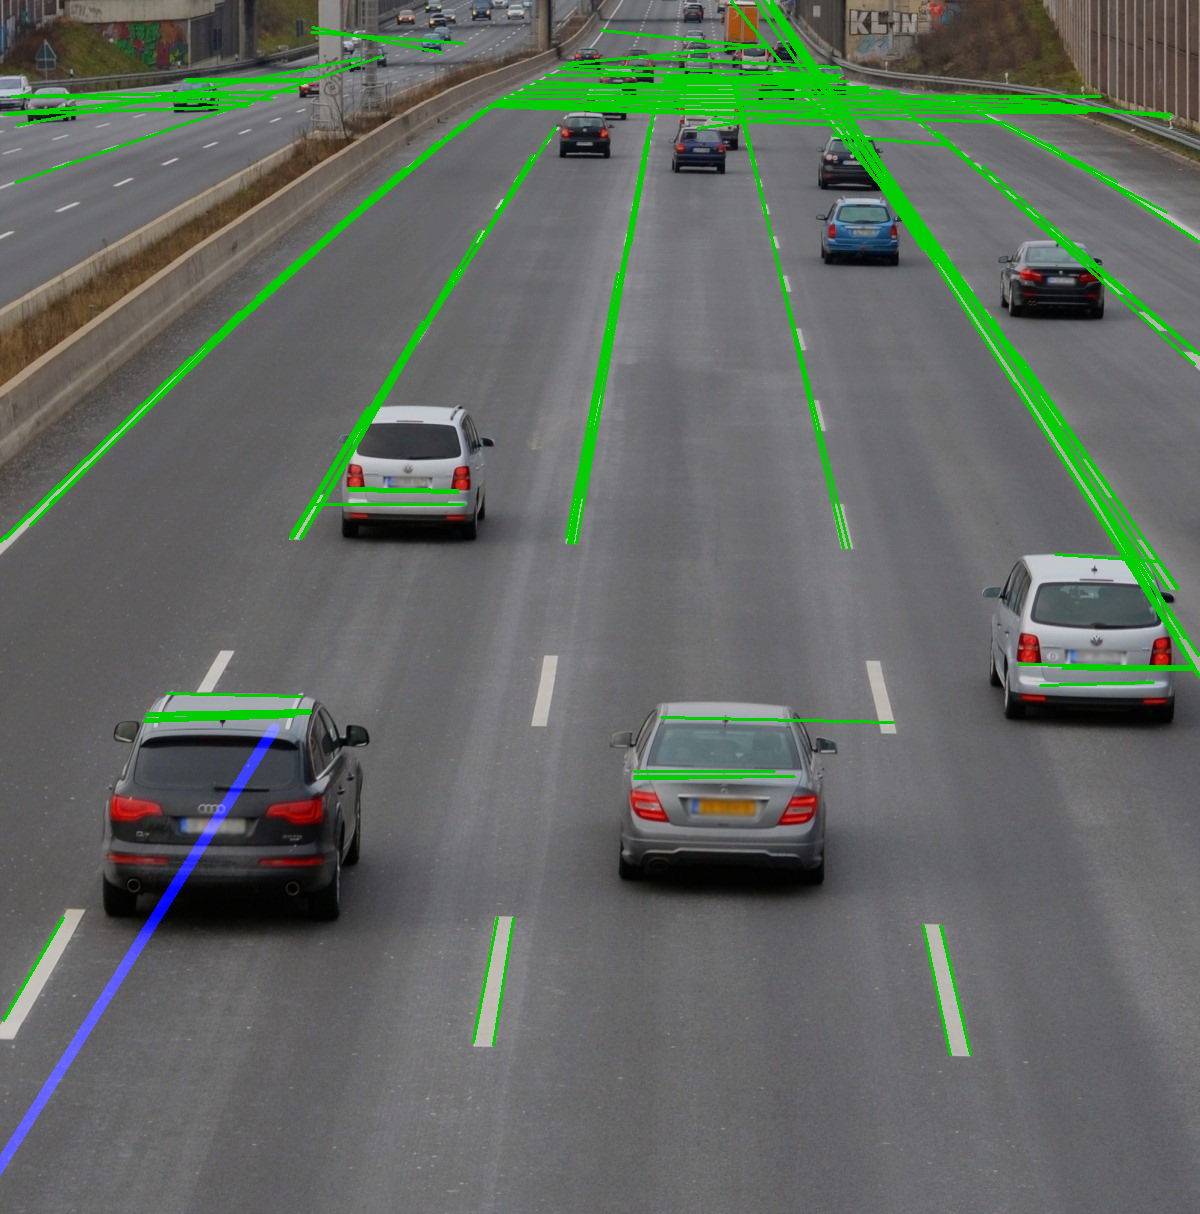

-1

In [23]:
def gaussian(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def canny(image, low_threshold, high_threshold):
    return cv2.Canny(image, low_threshold, high_threshold)

copy = np.copy(image)
gray_image = cv2.cvtColor(copy, cv2.COLOR_BGR2GRAY)
gaus = gaussian(gray_image)
edges = canny(gaus,50,150)
lines = cv2.HoughLinesP(isolated, 2, np.pi/180, 100, minLineLength=100, maxLineGap=100)
averaged_lines = average(copy, lines)
black_lines = display_lines(copy, lines_to_display)
lanes = cv2.addWeighted(copy, 0.8, black_lines, 1, 1)
cv2_imshow(lanes)
cv2.waitKey(0)